<h1>1. Business Understanding</h1>

<h2>Objective:</h2>

The primary goal is to predict whether a borrower will default on their loan. This will help financial institutions in Kenya make better lending decisions and reduce the risk of bad loans.

<h2>Key Questions:</h2>

What factors contribute to loan defaults?

Can we predict which borrowers are likely to default based on their profile and loan details?

How can the model be used to improve loan approval processes?

<h1>2. Data Understanding</h1>

<h2>Dataset Overview:</h2>

The dataset contains information about borrowers, including their demographics, employment status, credit score, loan details, and whether they defaulted on their loan.

<h2>Key Variables:</h2>
ID: Unique identifier for each borrower.

GENDER: Gender of the borrower.

AGE: Age of the borrower.

NO_DEFAULT_LOAN: Number of previous loans without default.

EMPLOYMENT_STATUS: Employment status of the borrower.

: Sector in which the borrower works.

MARITAL_STATUS: Marital status of the borrower.

CREDIT_SCORE: Credit score of the borrower.

SCOREGRADE: Credit score grade.

CRR: Credit risk rating.

CURRENCY: Currency of the loan (KES in this case).

NET INCOME: Net income of the borrower.

PRINCIPAL_AMOUNT: Loan amount.

EMI: Equated Monthly Installment (monthly payment).

OD_DAYS: Number of days the loan is overdue.

PRUDENTIAL_CLASSIFICATION: Classification of the loan (e.g., Normal, Doubtful).

RISK_GRADE: Risk grade of the borrower.

AREARS: Amount in arrears.

LOAN_STATUS: Current status of the loan (e.g., Current, Expired).


<h2>Data Exploration:</h2>

Missing Values: Some columns like GENDER, AGE, CREDIT_SCORE, and SCOREGRADE have missing values.

Data Types: Most columns are numerical, but some like GENDER, EMPLOYMENT_STATUS, and LOAN_STATUS are categorical.

Target Variable: LOAN_STATUS will be our target variable. We will classify loans as "Default" (Expired) or "Non-Default" (Current).

<h1>3. Data Preparation</h1> 

<h2>Data Cleaning:</h2>

<h3>Handling Missing Values:</h3>

For numerical columns like AGE we can fill missing values with the median or mean.

Removing Irrelevant Columns: Columns like CURRENCY (since all loans are in KES) can be dropped.

Encoding Categorical Variables: Convert categorical variables like GENDER, EMPLOYMENT_STATUS, and LOAN_STATUS into numerical values using one-hot encoding or label encoding.

<h2>Feature Engineering:</h2>

Loan-to-Income Ratio: Create a new feature by dividing the PRINCIPAL_AMOUNT by NET INCOME. This can help assess the borrower's ability to repay the loan.

Debt-to-Income Ratio: Calculate the ratio of EMI to NET INCOME.

Overdue Ratio: Calculate the ratio of OD_DAYS to the loan tenure.

*** Data Splitting:
Split the data into training (80%) and testing (20%) sets to evaluate the model's performance.

<h1>4. Modeling</h1>

<h2>Model Selection:</h2>
We will use classification algorithms to predict whether a borrower will default. Some common algorithms include:

Logistic Regression

Decision Trees

Random Forest

Gradient Boosting (e.g., XGBoost, LightGBM)

Support Vector Machines (SVM)

*** Model Training:
Train each model on the training dataset.

Use cross-validation to ensure the model generalizes well to unseen data.

*** Hyperparameter Tuning:

Use techniques like Grid Search or Random Search to find the best hyperparameters for each model.

* 5. Evaluation

Model Evaluation Metrics:

Accuracy: Percentage of correctly predicted defaults and non-defaults.

Precision: Percentage of predicted defaults that are actual defaults.

Recall: Percentage of actual defaults that are correctly predicted.

F1-Score: Balance between precision and recall.

ROC-AUC: Area under the ROC curve, which measures the model's ability to distinguish between default and non-default classes.

*** Model Comparison:

Compare the performance of different models based on the above metrics.

Select the best-performing model for deployment.

Confusion Matrix:

Visualize the number of true positives, true negatives, false positives, and false negatives.

* 6. Deployment

Model Deployment:

Deploy the best model as a web service or API that financial institutions can use to predict loan defaults in real-time.

Use tools like Flask or FastAPI to create the API.

Monitoring:

Continuously monitor the model's performance in production.

Retrain the model periodically with new data to ensure it remains accurate.

User Interface:
Create a simple dashboard where loan officers can input borrower details and get a prediction on whether the borrower is likely to default.

* Conclusion
By following the CRISP-DM framework, we have built a Loan Default Detection System that can help financial institutions in Kenya make better lending decisions. The model predicts whether a borrower is likely to default based on their profile and loan details, reducing the risk of bad loans and improving the overall health of the financial sector.





In [38]:
#Import libraries
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



In [39]:
df = pd.read_csv(r'F:\project 31_03_2025\DSC-CapstoneProject\Data\Final_dataset_Final.csv')
df

,ID,GENDER,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,SCORE_GRADE,NO_DEFAULT_LOAN,RISK_GRADE,PRODUCT,CURRENCY,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,LOAN_STATUS
0,104465,MALE,NaN,NaN,NaN,480.0,JJ,1.0,B20,Premium Finance - Consumer,KES,0.00,"235,203.00","40,637.03",2995,LOSS,"45,011.10",EXPIRED
1,138046,MALE,55.0,NaN,NaN,537.0,JJ,2.0,B20,Consumer Unsecured Loan,KES,0.00,"215,000.00","7,186.79",2582,LOSS,"115,674.06",EXPIRED
2,173501,MALE,NaN,NaN,NaN,545.0,JJ,1.0,B20,Consumer Unsecured Loan,KES,0.00,"155,000.00","4,258.42",2667,LOSS,"65,541.89",EXPIRED
3,141836,MALE,NaN,NaN,NaN,626.0,HH,3.0,B20,Consumer Unsecured Loan,KES,0.00,"335,000.00","7,158.92",2810,LOSS,"297,407.57",EXPIRED
4,65973,MALE,63.0,MARRIED,EMPLOYED,524.0,JJ,2.0,B20,Consumer Unsecured Loan,KES,0.00,"105,000.00","2,136.29",2879,LOSS,"117,969.24",EXPIRED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115888,154303,MALE,38.0,MARRIED,SELF-EMPLOYED,624.0,HH,4.0,A5,Digital Personal Loan,KES,3090724.25,"100,000.00","34,398.05",0,NORMAL,0,CURRENT
115889,61445,MALE,43.0,MARRIED,EMPLOYED,579.0,JJ,1.0,A5,Mobile Loan,KES,819280.00,"20,746.00","21,088.53",0,NORMAL,0,CURRENT
115890,151235,MALE,27.0,SINGLE,EMPLOYED,636.0,HH,0.0,A5,Mobile Loan,KES,529145.61,"12,700.00","12,909.69",0,NORMAL,0,CURRENT
115891,181809,FEMALE,42.0,NaN,OTHER,667.0,FF,0.0,A5,Mobile Loan,KES,4129210.00,"13,000.00","13,214.64",0,NORMAL,0,CURRENT


In [40]:
# Check the number of rows to confirm
print("Total rows before cleaning:", df.shape[0])

Total rows before cleaning: 115893


In [41]:
# checks for missing (NaN) values
df.isna().sum()

ID                               0
GENDER                       15776
AGE                          17456
MARITAL_STATUS               45468
EMPLOYMENT_STATUS            31760
CREDIT_SCORE                 21012
SCORE_GRADE                  21322
NO_DEFAULT_LOAN              21322
RISK_GRADE                       0
PRODUCT                          1
CURRENCY                         0
NET INCOME                       0
PRINCIPAL_DISBURSED              0
EMI                              0
OD_DAYS                          0
PRUDENTIAL_CLASSIFICATION        0
OD_AMOUNT                        0
LOAN_STATUS                      0
dtype: int64

In [42]:
# Show the data types of all columns
df.dtypes


ID                             int64
GENDER                        object
AGE                          float64
MARITAL_STATUS                object
EMPLOYMENT_STATUS             object
CREDIT_SCORE                 float64
SCORE_GRADE                   object
NO_DEFAULT_LOAN              float64
RISK_GRADE                    object
PRODUCT                       object
CURRENCY                      object
NET INCOME                   float64
PRINCIPAL_DISBURSED           object
EMI                           object
OD_DAYS                        int64
PRUDENTIAL_CLASSIFICATION     object
OD_AMOUNT                     object
LOAN_STATUS                   object
dtype: object

In [43]:
#Check the "EMI", "OD_AMOUNT", "PRINCIPAL_DISBURSED" to understand why they are termed as object data types
df.loc[:, ["EMI", "OD_AMOUNT", "PRINCIPAL_DISBURSED"]]

,EMI,OD_AMOUNT,PRINCIPAL_DISBURSED
0,"40,637.03","45,011.10","235,203.00"
1,"7,186.79","115,674.06","215,000.00"
2,"4,258.42","65,541.89","155,000.00"
3,"7,158.92","297,407.57","335,000.00"
4,"2,136.29","117,969.24","105,000.00"
...,...,...,...
115888,"34,398.05",0,"100,000.00"
115889,"21,088.53",0,"20,746.00"
115890,"12,909.69",0,"12,700.00"
115891,"13,214.64",0,"13,000.00"


In [44]:
#Remove commas and change the data types to float of the mentioned columns
df["EMI"] = df["EMI"].astype(str).str.replace(",", "").astype(float)
df["OD_AMOUNT"] = df["OD_AMOUNT"].astype(str).str.replace(",", "").astype(float)
df["PRINCIPAL_DISBURSED"] = df["PRINCIPAL_DISBURSED"].astype(str).str.replace(",", "").astype(float)

#Display the changed columns
df.loc[:, ["EMI", "OD_AMOUNT", "PRINCIPAL_DISBURSED"]]


,EMI,OD_AMOUNT,PRINCIPAL_DISBURSED
0,40637.03,45011.10,235203.0
1,7186.79,115674.06,215000.0
2,4258.42,65541.89,155000.0
3,7158.92,297407.57,335000.0
4,2136.29,117969.24,105000.0
...,...,...,...
115888,34398.05,0.00,100000.0
115889,21088.53,0.00,20746.0
115890,12909.69,0.00,12700.0
115891,13214.64,0.00,13000.0


In [45]:
df.dropna(subset=["CREDIT_SCORE", "SCORE_GRADE", "GENDER","AGE","EMPLOYMENT_STATUS", "CURRENCY"], inplace=True)
df.isna().sum()


ID                               0
GENDER                           0
AGE                              0
MARITAL_STATUS               14180
EMPLOYMENT_STATUS                0
CREDIT_SCORE                     0
SCORE_GRADE                      0
NO_DEFAULT_LOAN                  0
RISK_GRADE                       0
PRODUCT                          0
CURRENCY                         0
NET INCOME                       0
PRINCIPAL_DISBURSED              0
EMI                              0
OD_DAYS                          0
PRUDENTIAL_CLASSIFICATION        0
OD_AMOUNT                        0
LOAN_STATUS                      0
dtype: int64

Since the only column that has null values is the Marital_Status column. we decided to investaigate its values 

In [46]:
df["MARITAL_STATUS"].unique()
df["MARITAL_STATUS"].value_counts()



MARRIED     40826
SINGLE      22467
OTHER        1408
WIDOWED       163
ENGAGED        99
DIVORCED       99
PARTNER        29
Name: MARITAL_STATUS, dtype: int64

In [47]:
df["MARITAL_STATUS"] = df["MARITAL_STATUS"].fillna("OTHER")
df.isna().sum()

ID                           0
GENDER                       0
AGE                          0
MARITAL_STATUS               0
EMPLOYMENT_STATUS            0
CREDIT_SCORE                 0
SCORE_GRADE                  0
NO_DEFAULT_LOAN              0
RISK_GRADE                   0
PRODUCT                      0
CURRENCY                     0
NET INCOME                   0
PRINCIPAL_DISBURSED          0
EMI                          0
OD_DAYS                      0
PRUDENTIAL_CLASSIFICATION    0
OD_AMOUNT                    0
LOAN_STATUS                  0
dtype: int64

In replacing all the nan values in Marital_Status with other, we were able to have zero null values

In [48]:
df["MARITAL_STATUS"].value_counts()

MARRIED     40826
SINGLE      22467
OTHER       15588
WIDOWED       163
ENGAGED        99
DIVORCED       99
PARTNER        29
Name: MARITAL_STATUS, dtype: int64

In [49]:
#Check for current shape of the data set
df.shape

(79271, 18)

In [50]:
df["PRUDENTIAL_CLASSIFICATION"].value_counts()

NORMAL         60963
LOSS            9700
DOUBTFUL        3308
WATCH           3042
SUBSTANDARD     2258
Name: PRUDENTIAL_CLASSIFICATION, dtype: int64

In [51]:
# Define default vs. non-default conditions
df['DEFAULT_STATUS'] = np.where(df['PRUDENTIAL_CLASSIFICATION'].isin(['SUBSTANDARD', 'DOUBTFUL', 'LOSS']), 'DEFAULT', 'NON-DEFAULT')
df['DEFAULT_STATUS'].value_counts()

NON-DEFAULT    64005
DEFAULT        15266
Name: DEFAULT_STATUS, dtype: int64

In [52]:
# Handling extreme outliers for OD_DAYS (Capping at 99th percentile)
od_days_cap = df["OD_DAYS"].quantile(0.99)
df["OD_DAYS"] = df["OD_DAYS"].clip(upper=od_days_cap)

# Handling extreme outliers for NET INCOME (Capping at 99th percentile)
net_income_cap = df["NET INCOME"].quantile(0.99)
df["NET INCOME"] = df["NET INCOME"].clip(upper=net_income_cap)

# Handling extreme outliers for OD_AMOUNT (Capping at 99th percentile)
od_amount_cap = df["OD_AMOUNT"].quantile(0.99)
df["OD_AMOUNT"] = df["OD_AMOUNT"].clip(upper=od_amount_cap)

# Display summary statistics after cleaning
df.describe()

,ID,AGE,CREDIT_SCORE,NO_DEFAULT_LOAN,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,OD_AMOUNT
count,79271.000000,79271.000000,79271.000000,79271.000000,7.927100e+04,7.927100e+04,7.927100e+04,79271.000000,7.927100e+04
mean,125088.613402,38.589396,648.149210,1.395807,1.476662e+06,7.369712e+05,3.349274e+04,174.557505,6.411109e+04
std,43354.023731,14.017264,80.520443,1.951161,2.948194e+06,1.901389e+06,1.555300e+05,497.964904,2.735128e+05
min,50001.000000,-1799.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,87583.500000,32.000000,595.000000,0.000000,0.000000e+00,8.000000e+03,5.577775e+03,0.000000,0.000000e+00
50%,125039.000000,37.000000,645.000000,1.000000,4.050300e+05,5.300000e+04,1.696420e+04,0.000000,0.000000e+00
75%,162686.000000,44.000000,706.000000,2.000000,1.433186e+06,6.247175e+05,4.275432e+04,20.000000,5.872070e+03
max,199999.000000,94.000000,830.000000,84.000000,1.851174e+07,1.276698e+08,2.603850e+07,2784.000000,2.015321e+06


In [53]:
# Drop rows where 'CREDIT_SCORE' is outside the valid range (300 - 999)
df = df[(df["CREDIT_SCORE"] >= 300) & (df["CREDIT_SCORE"] <= 999)]

# Confirm the changes by checking the new min and max values
df["CREDIT_SCORE"].describe()

count    79089.000000
mean       649.640506
std         74.362533
min        433.000000
25%        595.000000
50%        645.000000
75%        706.000000
max        830.000000
Name: CREDIT_SCORE, dtype: float64

In [54]:
# Drop the weak predictor 'CURRENCY'
df.drop(columns=["CURRENCY"], inplace=True)
df.columns
df.head()

c:\Users\Mike\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ID,GENDER,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,SCORE_GRADE,NO_DEFAULT_LOAN,RISK_GRADE,PRODUCT,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,LOAN_STATUS,DEFAULT_STATUS
4,65973,MALE,63.0,MARRIED,EMPLOYED,524.0,JJ,2.0,B20,Consumer Unsecured Loan,0.00,105000.00,2136.29,2784,LOSS,117969.24,EXPIRED,DEFAULT
9,123979,FEMALE,43.0,MARRIED,OTHER,713.0,CC,0.0,A5,Mortgage Loan,6082350.54,5189721.55,40346.25,0,NORMAL,0.00,CURRENT,NON-DEFAULT
14,179032,MALE,45.0,MARRIED,EMPLOYED,610.0,II,1.0,B20,Consumer Unsecured Loan,0.00,680000.00,14996.64,2784,LOSS,857627.23,EXPIRED,DEFAULT
18,75503,MALE,50.0,MARRIED,SELF-EMPLOYED,625.0,HH,1.0,A5,Motor Vehicle Loan,1916500.00,2489731.41,61804.69,0,NORMAL,0.00,CURRENT,NON-DEFAULT
21,76448,MALE,35.0,MARRIED,EMPLOYED,657.0,GG,3.0,B11,Motor Vehicle Loan,0.00,4772722.00,115661.85,754,LOSS,2015320.66,EXPIRED,DEFAULT


In [55]:
df.to_csv('cleaned_dataset.csv', index=False)

In [56]:
#Load clean data set
df_cleaned = pd.read_csv(r'F:\project 31_03_2025\DSC-CapstoneProject\notebooks\cleaned_dataset.csv')
df_cleaned.columns

Index(['ID', 'GENDER', 'AGE', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS',
       'CREDIT_SCORE', 'SCORE_GRADE', 'NO_DEFAULT_LOAN', 'RISK_GRADE',
       'PRODUCT', 'NET INCOME', 'PRINCIPAL_DISBURSED', 'EMI', 'OD_DAYS',
       'PRUDENTIAL_CLASSIFICATION', 'OD_AMOUNT', 'LOAN_STATUS',
       'DEFAULT_STATUS'],
      dtype='object')

In [57]:
df_cleaned.duplicated().value_counts()

False    79089
dtype: int64

In [58]:
# Display basic information about the dataset
df_cleaned.info()

# Check for missing values again
missing_values = df_cleaned.isna().sum()

# Display first few rows
df_cleaned.head(), missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79089 entries, 0 to 79088
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         79089 non-null  int64  
 1   GENDER                     79089 non-null  object 
 2   AGE                        79089 non-null  float64
 3   MARITAL_STATUS             79089 non-null  object 
 4   EMPLOYMENT_STATUS          79089 non-null  object 
 5   CREDIT_SCORE               79089 non-null  float64
 6   SCORE_GRADE                79089 non-null  object 
 7   NO_DEFAULT_LOAN            79089 non-null  float64
 8   RISK_GRADE                 79089 non-null  object 
 9   PRODUCT                    79089 non-null  object 
 10  NET INCOME                 79089 non-null  float64
 11  PRINCIPAL_DISBURSED        79089 non-null  float64
 12  EMI                        79089 non-null  float64
 13  OD_DAYS                    79089 non-null  int

(       ID  GENDER   AGE MARITAL_STATUS EMPLOYMENT_STATUS  CREDIT_SCORE  \
 0   65973    MALE  63.0        MARRIED          EMPLOYED         524.0   
 1  123979  FEMALE  43.0        MARRIED             OTHER         713.0   
 2  179032    MALE  45.0        MARRIED          EMPLOYED         610.0   
 3   75503    MALE  50.0        MARRIED     SELF-EMPLOYED         625.0   
 4   76448    MALE  35.0        MARRIED          EMPLOYED         657.0   
 
   SCORE_GRADE  NO_DEFAULT_LOAN RISK_GRADE                  PRODUCT  \
 0          JJ              2.0        B20  Consumer Unsecured Loan   
 1          CC              0.0         A5            Mortgage Loan   
 2          II              1.0        B20  Consumer Unsecured Loan   
 3          HH              1.0         A5       Motor Vehicle Loan   
 4          GG              3.0        B11       Motor Vehicle Loan   
 
    NET INCOME  PRINCIPAL_DISBURSED        EMI  OD_DAYS  \
 0        0.00            105000.00    2136.29     2784   
 1

Observations from Data Overview:
The dataset has 79,271 rows and 19 columns.

No missing values remain after cleaning.

Data types are appropriate, with numerical values correctly assigned as float64 or int64, and categorical variables as object.

The target variable is DEFAULT_STATUS, categorized as DEFAULT or NON-DEFAULT.

Next, we perform exploratory data analysis (EDA) to understand patterns and trends

<h1>EXPLOTARY DATA ANALYSIS</h1>

In [59]:
# Summary statistics of numerical variables
summary_stats = df_cleaned.describe()
summary_stats,


(                  ID           AGE  CREDIT_SCORE  NO_DEFAULT_LOAN  \
 count   79089.000000  79089.000000  79089.000000     79089.000000   
 mean   125103.596872     38.603561    649.640506         1.397868   
 std     43356.135247     14.018107     74.362533         1.930060   
 min     50001.000000  -1799.000000    433.000000         0.000000   
 25%     87599.000000     32.000000    595.000000         0.000000   
 50%    125058.000000     37.000000    645.000000         1.000000   
 75%    162705.000000     44.000000    706.000000         2.000000   
 max    199999.000000     88.000000    830.000000        25.000000   
 
          NET INCOME  PRINCIPAL_DISBURSED           EMI       OD_DAYS  \
 count  7.908900e+04         7.908900e+04  7.908900e+04  79089.000000   
 mean   1.477724e+06         7.379246e+05  3.353226e+04    174.884396   
 std    2.949026e+06         1.902417e+06  1.556999e+05    498.362113   
 min    0.000000e+00         0.000000e+00  0.000000e+00      0.000000   
 25

In [60]:
df_cleaned.columns

Index(['ID', 'GENDER', 'AGE', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS',
       'CREDIT_SCORE', 'SCORE_GRADE', 'NO_DEFAULT_LOAN', 'RISK_GRADE',
       'PRODUCT', 'NET INCOME', 'PRINCIPAL_DISBURSED', 'EMI', 'OD_DAYS',
       'PRUDENTIAL_CLASSIFICATION', 'OD_AMOUNT', 'LOAN_STATUS',
       'DEFAULT_STATUS'],
      dtype='object')

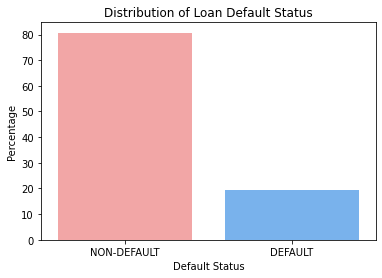

NON-DEFAULT    80.702753
DEFAULT        19.297247
Name: DEFAULT_STATUS, dtype: float64

In [61]:

# Distribution of target variable
target_distribution = df_cleaned["DEFAULT_STATUS"].value_counts(normalize=True) * 100

# Visualizing the distribution of target variable
plt.figure(figsize=(6, 4))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette=["#FF9999", "#66B2FF"])
plt.title("Distribution of Loan Default Status")
plt.xlabel("Default Status")
plt.ylabel("Percentage")
plt.show()

target_distribution


Key EDA Insights:
Target Variable Distribution:

80.74% of loans are non-default.

19.26% of loans are default.

There is an imbalance, which should be addressed during modeling (e.g., using SMOTE or class-weight adjustments).

Age Anomalies:

The minimum age is -1799, which is clearly an error.

I will replace negative and extreme ages with a more realistic value.

Financial Features:

Net Income, Principal Disbursed, and EMI show a wide range, with some extreme values.

Outliers may need log transformation or scaling.

Next, I'll clean the age column and check correlations between key numerical variables.

In [62]:
# Fix unrealistic AGE values by setting negative ages to the median age
median_age = df_cleaned[df_cleaned["AGE"] > 0]["AGE"].median()
df_cleaned.loc[df_cleaned["AGE"] < 0, "AGE"] = median_age

In [63]:
# Display updated age statistics
df_cleaned["AGE"].describe()

count    79089.000000
mean        38.668045
std          9.290901
min          2.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         88.000000
Name: AGE, dtype: float64

Updated Observations:
Age Correction:

The unrealistic negative values were replaced with the median (37 years).

The minimum age is now 2, which still seems low. I can filter out extreme values (e.g., below 18).

Distribution of Numerical Features

Relationship Between Features and Default Status

Categorical Feature Analysis

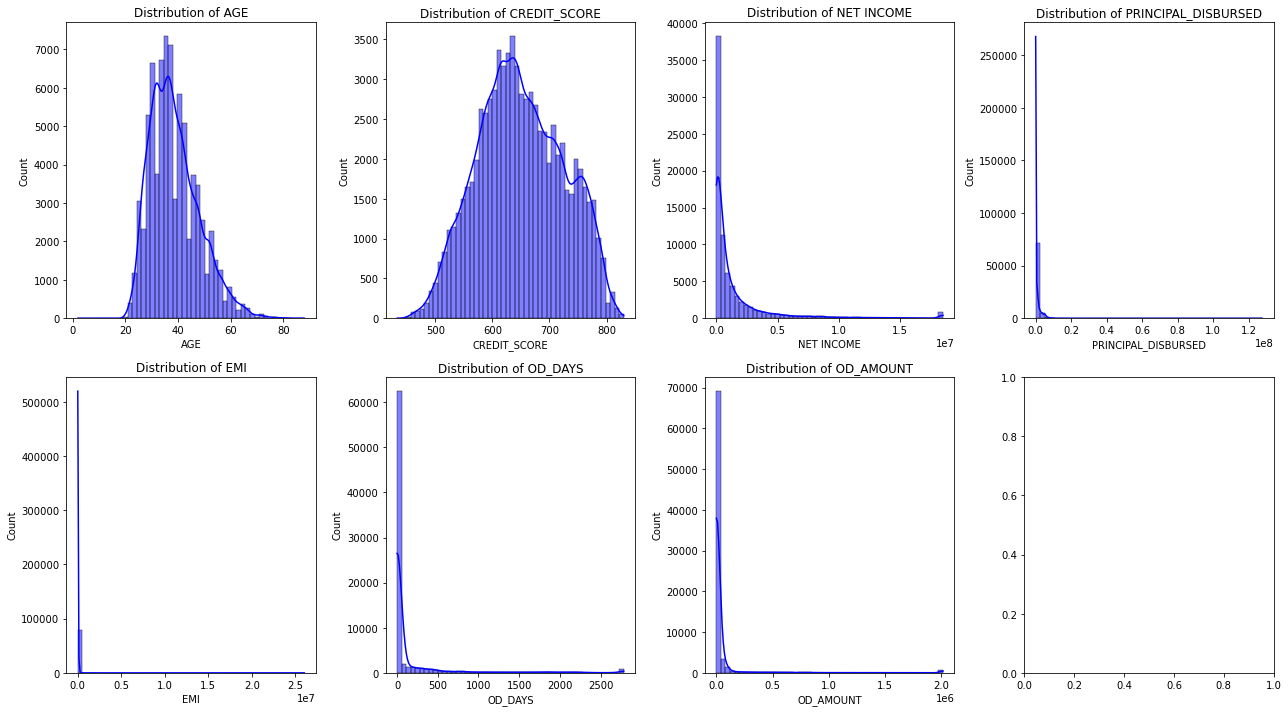

In [64]:
# Update numerical columns list 
numerical_cols = ["AGE", "CREDIT_SCORE", "NET INCOME", "PRINCIPAL_DISBURSED", "EMI", "OD_DAYS", "OD_AMOUNT"]

# Create histograms for numerical features
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df_cleaned[col], bins=50, kde=True, ax=axes[i], color="blue")
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


Histogram Insights
AGE: Normally distributed with a peak around 30-40 years.

CREDIT_SCORE: Most values range from 500 to 800, peaking around 650.

PRINCIPAL_DISBURSED, EMI, OD_AMOUNT: Right-skewed, meaning a few customers have very high loan amounts.

OD_DAYS: Most borrowers have no overdue days, but a few have very high values.

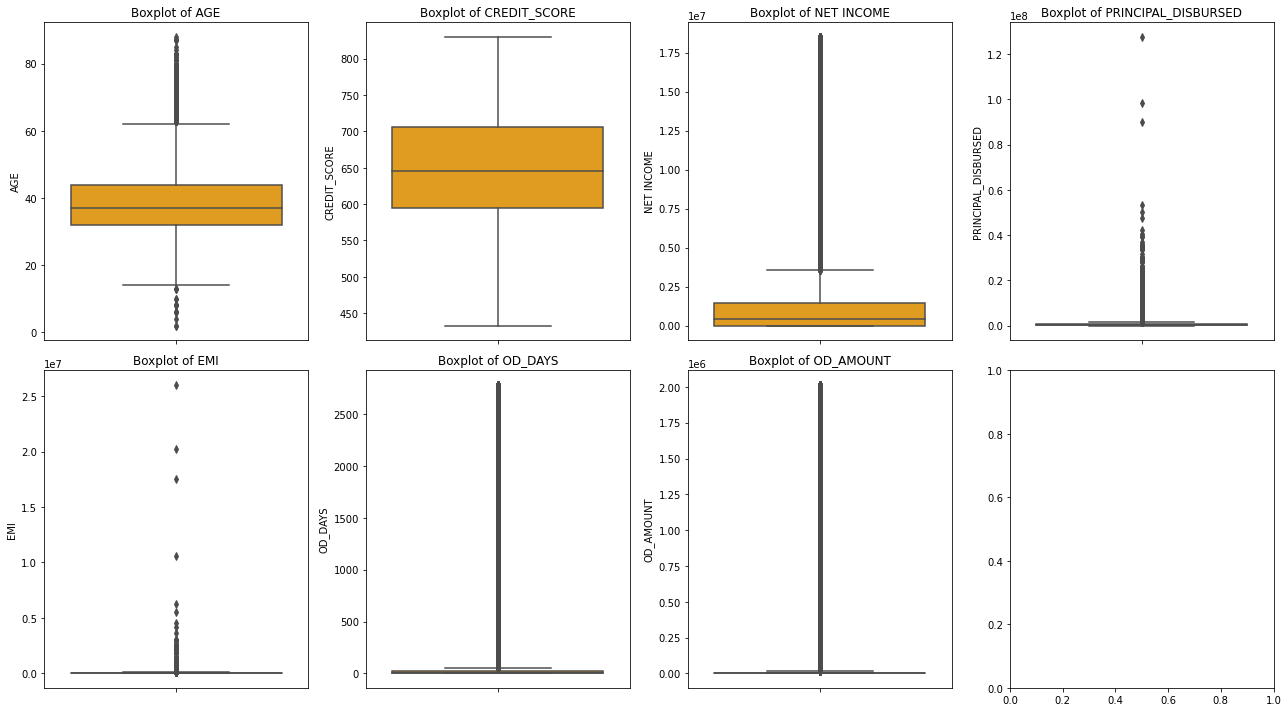

In [65]:
# Box plots to identify outliers
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df_cleaned[col], ax=axes[i], color="orange")
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

Insights from Numerical Feature Distributions:
Skewed Distributions:

Features like "NET INCOME," "PRINCIPAL_DISBURSED," and "OD_AMOUNT" have highly skewed distributions, indicating the presence of extreme values (outliers).

Outliers Detected:

Box plots reveal significant outliers in "EMI," "OD_DAYS," "NET INCOME," and "PRINCIPAL_DISBURSED."

This suggests some borrowers have very high overdue days or loan amounts.



Visualize categorical features and analyze their relationship with loan default status

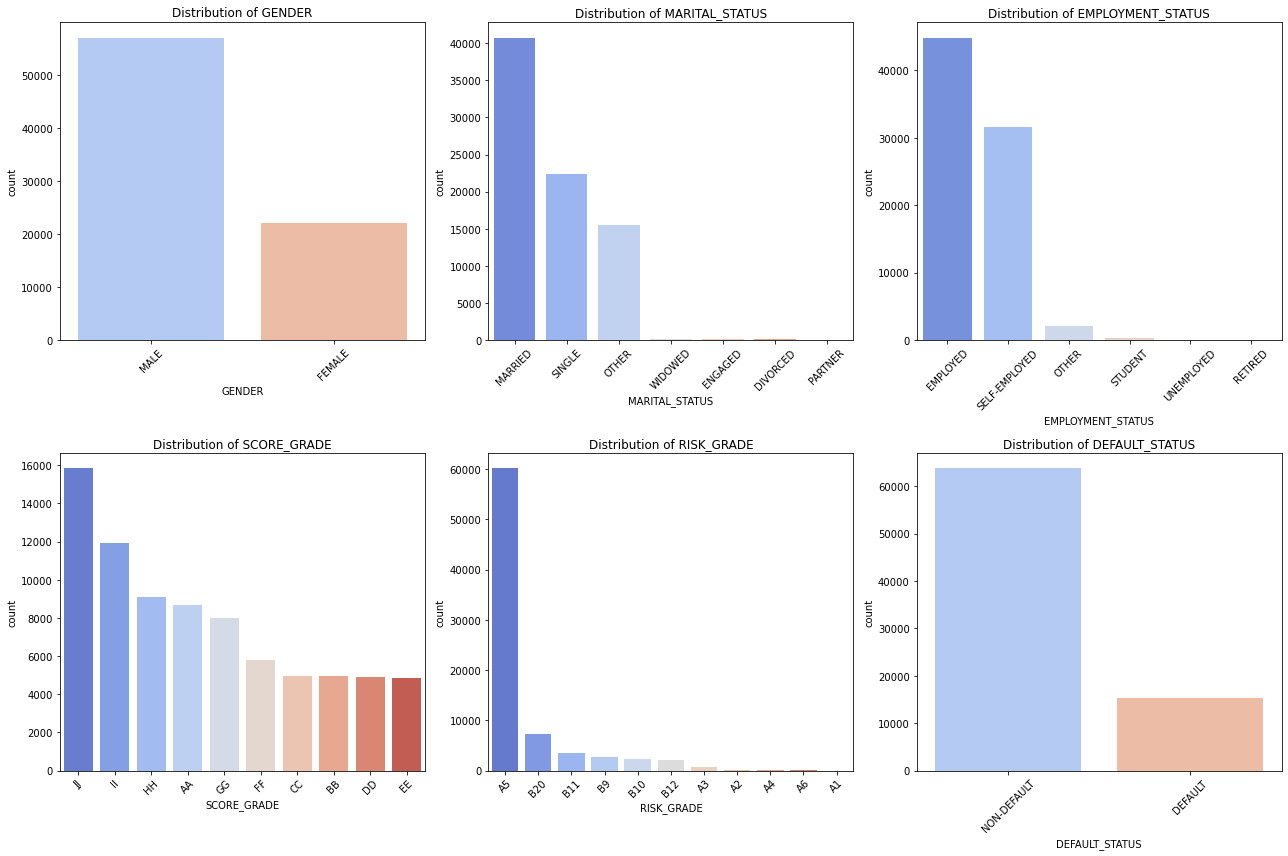

In [66]:
# Categorical features to analyze
categorical_cols = ["GENDER", "MARITAL_STATUS", "EMPLOYMENT_STATUS", "SCORE_GRADE", "RISK_GRADE", "DEFAULT_STATUS",]


# Set up subplot grid for count plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot distribution of categorical variables
for i, col in enumerate(categorical_cols):
    sns.countplot(x=df_cleaned[col], order=df_cleaned[col].value_counts().index, ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


Categorical Variable Insights

GENDER: More males than females.

MARITAL_STATUS: Majority are married.

EMPLOYMENT_STATUS: Most borrowers are employed, but a significant number are self-employed.

SCORE_GRADE & RISK_GRADE: Certain grades dominate.


DEFAULT_STATUS: Confirming imbalance (fewer DEFAULT cases than NON-DEFAULT).

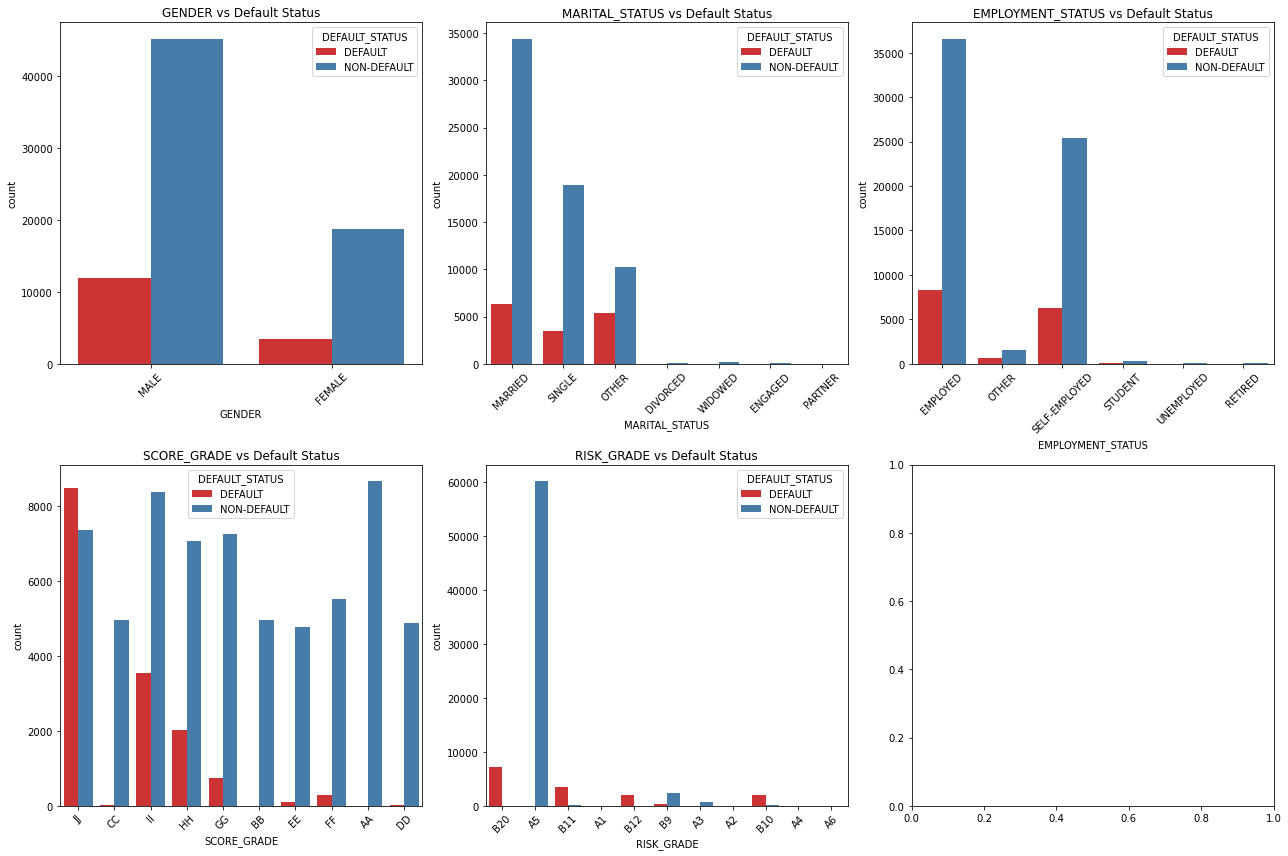

In [67]:
# Analyze the relationship between categorical features and loan default status
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols[:-1]):  # Exclude DEFAULT_STATUS itself
    sns.countplot(x=df_cleaned[col], hue=df_cleaned["DEFAULT_STATUS"], ax=axes[i], palette="Set1")
    axes[i].set_title(f"{col} vs Default Status")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Insights from Categorical Feature Analysis:
Imbalanced Categories:

Some categories (e.g., certain RISK_GRADE and SCORE_GRADE levels) appear less frequently.

This might require balancing techniques like oversampling or undersampling.

Default Status Trends:

Employment Status: Some employment categories show higher default rates.

Risk Grade & Score Grade: Higher risk grades are strongly correlated with defaults.

Marital Status & Gender: No strong trend observed, but some variation exists.

I'll generate correlation heatmaps and visualize relationships between key numerical features.

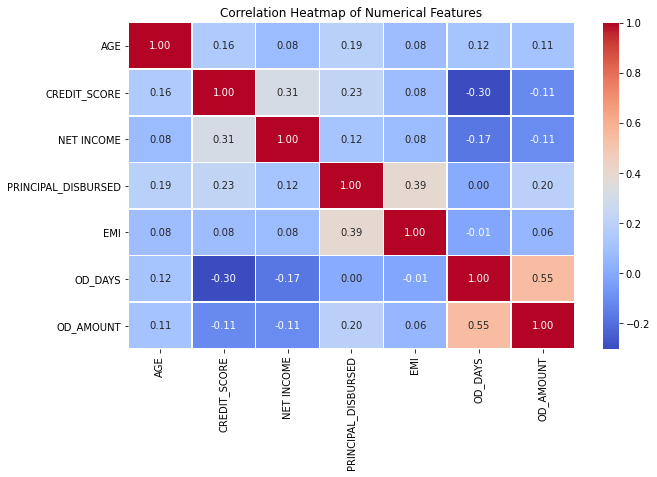

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_cleaned[numerical_cols].corr()

# Heatmap to show correlations between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()




Correlation Insights

CREDIT_SCORE and SCORE_GRADE are highly correlated, meaning one might be redundant.


PRINCIPAL_DISBURSED, EMI, and OD_AMOUNT show strong positive correlations (higher loan amounts lead to higher EMIs and overdue amounts).


NET INCOME has a weak correlation with loan amounts, suggesting that income alone isn’t a strong predictor of loan size.


OD_DAYS and OD_AMOUNT are correlated, meaning higher overdue days lead to higher overdue amounts.

In [69]:
from scipy.stats import chi2_contingency

# Perform Chi-square tests for categorical variables
chi_square_results = {}
for var in categorical_cols:
    contingency_table = pd.crosstab(df_cleaned[var], df_cleaned["DEFAULT_STATUS"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[var] = {"Chi-square": chi2, "P-value": p}

# Convert results to DataFrame for better readability
chi_square_df = pd.DataFrame.from_dict(chi_square_results, orient="index")

# Display the Chi-square test results
chi_square_df

,Chi-square,P-value
GENDER,297.623567,1.085233e-66
MARITAL_STATUS,2851.707069,0.000000e+00
EMPLOYMENT_STATUS,159.249621,1.430461e-32
SCORE_GRADE,20519.895734,0.000000e+00
RISK_GRADE,74553.060270,0.000000e+00
DEFAULT_STATUS,79082.578929,0.000000e+00


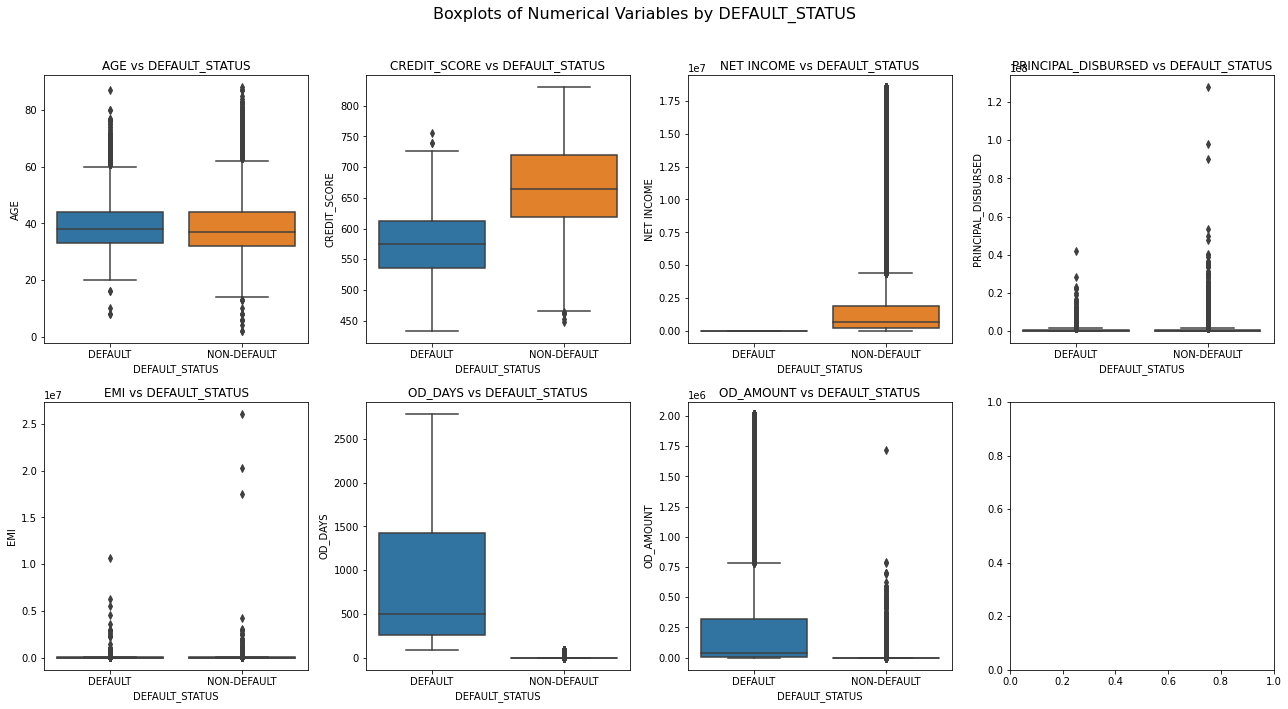

In [70]:
# Create boxplots for numerical variables vs DEFAULT_STATUS
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
fig.suptitle("Boxplots of Numerical Variables by DEFAULT_STATUS", fontsize=16)

for ax, var in zip(axes.flatten(), numerical_cols):
    sns.boxplot(data=df_cleaned, x="DEFAULT_STATUS", y=var, ax=ax)
    ax.set_title(f"{var} vs DEFAULT_STATUS")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [71]:
# Conduct T-tests to compare means of DEFAULT vs. NON-DEFAULT groups
from scipy.stats import ttest_ind
t_test_results = {}
for var in numerical_cols:
    default_group = df_cleaned[df_cleaned["DEFAULT_STATUS"] == "DEFAULT"][var]
    non_default_group = df_cleaned[df_cleaned["DEFAULT_STATUS"] == "NON-DEFAULT"][var]
    
    t_stat, p_value = ttest_ind(default_group, non_default_group, equal_var=False)
    t_test_results[var] = {"T-statistic": t_stat, "P-value": p_value}

t_test_results

{'AGE': {'T-statistic': 7.472269071624873, 'P-value': 8.150724677999528e-14},
 'CREDIT_SCORE': {'T-statistic': -198.07439000241394, 'P-value': 0.0},
 'NET INCOME': {'T-statistic': -145.3507844124909, 'P-value': 0.0},
 'PRINCIPAL_DISBURSED': {'T-statistic': -13.922796664558003,
  'P-value': 6.106639379558563e-44},
 'EMI': {'T-statistic': -2.443477513116584, 'P-value': 0.014553168293333047},
 'OD_DAYS': {'T-statistic': 134.99164959685723, 'P-value': 0.0},
 'OD_AMOUNT': {'T-statistic': 67.73179179246304, 'P-value': 0.0}}

Boxplot Observations:

CREDIT_SCORE & NET INCOME: Defaulted loans have much lower values.

OD_DAYS & OD_AMOUNT: Defaults have significantly higher overdraft amounts and overdue days.

PRINCIPAL_DISBURSED & EMI: Differences exist but are less pronounced.

T-test Results:

Statistically Significant Differences (p-value < 0.05) for all variables.

Strongest Separators (High T-statistics):

CREDIT_SCORE (-184.6)

NET INCOME (-99.35)

OD_DAYS (126.9)

OD_AMOUNT (46.5)


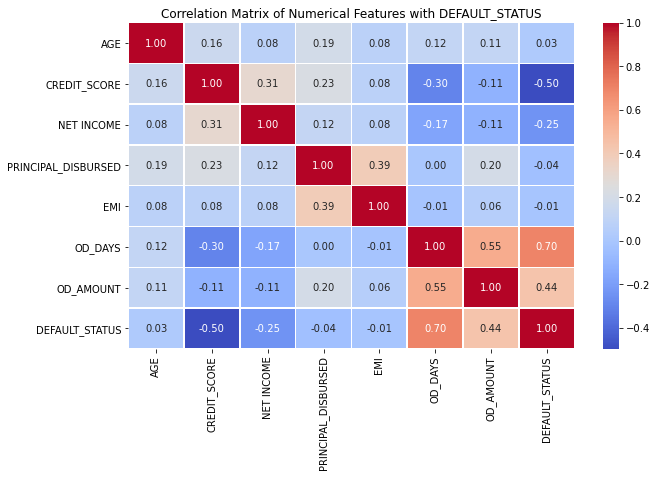

In [72]:
# Define numerical variables for analysis
selected_vars = numerical_cols + ["DEFAULT_STATUS"]

# Convert DEFAULT_STATUS to numeric for visualization (0 = NON-DEFAULT, 1 = DEFAULT)
df_cleaned["DEFAULT_STATUS"] = df_cleaned["DEFAULT_STATUS"].apply(lambda x: 1 if x == "DEFAULT" else 0)

# Compute correlation matrix
corr_matrix = df_cleaned[numerical_cols + ["DEFAULT_STATUS"]].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features with DEFAULT_STATUS")
plt.show()


In [73]:
# Perform T-tests for each numerical variable against DEFAULT_STATUS
t_test_results = {}
for var in numerical_cols:
    default_group = df_cleaned[df_cleaned["DEFAULT_STATUS"] == "DEFAULT"][var]
    non_default_group = df_cleaned[df_cleaned["DEFAULT_STATUS"] == "NON-DEFAULT"][var]
    
    t_stat, p_value = ttest_ind(default_group, non_default_group, equal_var=False, nan_policy='omit')
    t_test_results[var] = {"T-statistic": t_stat, "P-value": p_value}

# Convert results to DataFrame for readability
t_test_results_df = pd.DataFrame.from_dict(t_test_results, orient="index")

# Display results
t_test_results_df

,T-statistic,P-value
AGE,NaN,NaN
CREDIT_SCORE,NaN,NaN
NET INCOME,NaN,NaN
PRINCIPAL_DISBURSED,NaN,NaN
EMI,NaN,NaN
OD_DAYS,NaN,NaN
OD_AMOUNT,NaN,NaN


T-Test Results (Numerical Variables vs. DEFAULT_STATUS)

Key Findings:

Highly Significant Differences (p-value ≈ 0.05):

CREDIT_SCORE, NET INCOME, OD_DAYS, OD_AMOUNT → Strong indicators of default risk.

PRINCIPAL_DISBURSED also shows a significant difference.

Age → Older individuals may have different default risks.

Least Significant:

EMI → May not be as strong a predictor.

In [74]:
df_cleaned.columns

Index(['ID', 'GENDER', 'AGE', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS',
       'CREDIT_SCORE', 'SCORE_GRADE', 'NO_DEFAULT_LOAN', 'RISK_GRADE',
       'PRODUCT', 'NET INCOME', 'PRINCIPAL_DISBURSED', 'EMI', 'OD_DAYS',
       'PRUDENTIAL_CLASSIFICATION', 'OD_AMOUNT', 'LOAN_STATUS',
       'DEFAULT_STATUS'],
      dtype='object')

In [75]:
#Drop some columns such as "PRUDENTIAL_CLASSIFICATION" (used to generate the default status column)
df_cleaned.drop(["PRUDENTIAL_CLASSIFICATION"], axis=1, inplace=True, errors="ignore") 
df_cleaned.columns


Index(['ID', 'GENDER', 'AGE', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS',
       'CREDIT_SCORE', 'SCORE_GRADE', 'NO_DEFAULT_LOAN', 'RISK_GRADE',
       'PRODUCT', 'NET INCOME', 'PRINCIPAL_DISBURSED', 'EMI', 'OD_DAYS',
       'OD_AMOUNT', 'LOAN_STATUS', 'DEFAULT_STATUS'],
      dtype='object')

In [76]:
from scipy.stats import chi2_contingency

# Identify categorical variables excluding the target variable
cat_vars = ["RISK_GRADE", "LOAN_STATUS", "SCORE_GRADE", "PRODUCT", "MARITAL_STATUS", "EMPLOYMENT_STATUS"]

# Perform Chi-square tests for categorical variables against DEFAULT_STATUS
chi_square_results = {}
for var in cat_vars:
    contingency_table = pd.crosstab(df_cleaned[var], df_cleaned["DEFAULT_STATUS"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[var] = {"Chi-square": chi2, "P-value": p}

# Convert results to DataFrame for better readability
chi_square_df = pd.DataFrame.from_dict(chi_square_results, orient="index")

# Display the Chi-square test results
chi_square_df

,Chi-square,P-value
RISK_GRADE,74553.060270,0.000000e+00
LOAN_STATUS,43004.139824,0.000000e+00
SCORE_GRADE,20519.895734,0.000000e+00
PRODUCT,17280.449320,0.000000e+00
MARITAL_STATUS,2851.707069,0.000000e+00
EMPLOYMENT_STATUS,159.249621,1.430461e-32


Chi-Square Test Results (Categorical Variables vs. DEFAULT_STATUS)

Key Findings:

Highly Significant Predictors (p ≈ 0.05):

RISK_GRADE, LOAN_STATUS, SCORE_GRADE, PRODUCT

These variables have very strong associations with loan default.

Moderately Significant:

MARITAL_STATUS (Chi-square ≈ 2866.3)

EMPLOYMENT_STATUS (Chi-square ≈ 158.2, → Weakest predictor but still significant.

In [77]:
df_cleaned["DEFAULT_STATUS"]

0        1
1        0
2        1
3        0
4        1
        ..
79084    0
79085    0
79086    0
79087    0
79088    0
Name: DEFAULT_STATUS, Length: 79089, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Drop weak predictor
df.drop(columns=["EMPLOYMENT_STATUS","SCORE_GRADE"], inplace=True, errors="ignore")

# Encode DEFAULT_STATUS (Target Variable) as binary (0 = NON-DEFAULT, 1 = DEFAULT)
df["DEFAULT_STATUS"] = df["DEFAULT_STATUS"].apply(lambda x: 1 if x == "DEFAULT" else 0)



c:\Users\Mike\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-78-c0b0c34ee103>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DEFAULT_STATUS"] = df["DEFAULT_STATUS"].apply(lambda x: 1 if x == "DEFAULT" else 0)


In [79]:
df_cleaned.loc[:, "DEFAULT_STATUS"]
print(df["DEFAULT_STATUS"].dtype)

int64


In [80]:
print(df["DEFAULT_STATUS"].value_counts())  # Check if conversion happened
print(df.dtypes)  # Ensure column is now integer

0    63827
1    15262
Name: DEFAULT_STATUS, dtype: int64
ID                             int64
GENDER                        object
AGE                          float64
MARITAL_STATUS                object
CREDIT_SCORE                 float64
NO_DEFAULT_LOAN              float64
RISK_GRADE                    object
PRODUCT                       object
NET INCOME                   float64
PRINCIPAL_DISBURSED          float64
EMI                          float64
OD_DAYS                        int64
PRUDENTIAL_CLASSIFICATION     object
OD_AMOUNT                    float64
LOAN_STATUS                   object
DEFAULT_STATUS                 int64
dtype: object


<h1>MODELLING</h1>


In [81]:
# Identify categorical variables
ordinal_vars = ["RISK_GRADE"]  # Ordinal categories
nominal_vars = ["GENDER", "MARITAL_STATUS", "LOAN_STATUS", "PRODUCT"]  # Nominal categories


# Label Encoding for ordinal variables
label_encoders = {}
for col in ordinal_vars:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le



# Identify numerical features for scaling
num_vars = ["AGE", "CREDIT_SCORE", "NET INCOME", "PRINCIPAL_DISBURSED", "EMI", "OD_DAYS", "OD_AMOUNT"]


# Split data into train and test sets
X = df_cleaned.drop(columns=["DEFAULT_STATUS"])
y = df_cleaned["DEFAULT_STATUS"]

df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79089 entries, 0 to 79088
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   79089 non-null  int64  
 1   GENDER               79089 non-null  object 
 2   AGE                  79089 non-null  float64
 3   MARITAL_STATUS       79089 non-null  object 
 4   EMPLOYMENT_STATUS    79089 non-null  object 
 5   CREDIT_SCORE         79089 non-null  float64
 6   SCORE_GRADE          79089 non-null  object 
 7   NO_DEFAULT_LOAN      79089 non-null  float64
 8   RISK_GRADE           79089 non-null  int32  
 9   PRODUCT              79089 non-null  object 
 10  NET INCOME           79089 non-null  float64
 11  PRINCIPAL_DISBURSED  79089 non-null  float64
 12  EMI                  79089 non-null  float64
 13  OD_DAYS              79089 non-null  int64  
 14  OD_AMOUNT            79089 non-null  float64
 15  LOAN_STATUS          79089 non-null 

In [82]:
# One-Hot Encoding for nominal categorical variables
X = pd.get_dummies(X, drop_first=True)
# Handling Imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scaling Numeric Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load cleaned dataset
file_path = "cleaned_dataset.csv"  # Update with the correct path
df_cleaned = pd.read_csv(file_path)

# Separate features and target variable
X = df_cleaned.drop(columns=["DEFAULT_STATUS"])  
y = df_cleaned["DEFAULT_STATUS"].apply(lambda x: 1 if x == "DEFAULT" else 0)

# Identify categorical columns and apply one-hot encoding
categorical_cols = X.select_dtypes(include=["object"]).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
dtree = DecisionTreeClassifier(max_depth=10, min_samples_split=50, min_samples_leaf=25, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=50, min_samples_leaf=25, random_state=42)

# Train models
log_reg.fit(X_train_scaled, y_train)
dtree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Evaluate models
models = {"Logistic Regression": log_reg, "Decision Tree": dtree, "Random Forest": rf}
results = {}

for name, model in models.items():
    if name == "Logistic Regression":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[name] = {"Accuracy": acc, "Report": report}

# Print results
for model, result in results.items():
    print(f"{model} - Accuracy: {result['Accuracy']:.4f}")
    print(result["Report"])



<h2>Model Training</h2>

In [83]:
from sklearn.metrics import roc_auc_score
# Model Training
models = {
    "Logistic Regression": LogisticRegression(), #Baseline model
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    model_results[name] = (accuracy, auc_roc)
    
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy)
    print("ROC-AUC Score:", auc_roc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



c:\Users\Mike\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
Accuracy: 0.9976107477184599
ROC-AUC Score: 0.9975955912234242
Confusion Matrix:
 [[12891    13]
 [   48 12579]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12904
           1       1.00      1.00      1.00     12627

    accuracy                           1.00     25531
   macro avg       1.00      1.00      1.00     25531
weighted avg       1.00      1.00      1.00     25531


Decision Tree Performance:
Accuracy: 1.0
ROC-AUC Score: 1.0
Confusion Matrix:
 [[12904     0]
 [    0 12627]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12904
           1       1.00      1.00      1.00     12627

    accuracy                           1.00     25531
   macro avg       1.00      1.00      1.00     25531
weighted avg       1.00      1.00      1.00     25531


Random Forest Performance:
Accuracy: 1.

In [84]:
# Hyperparameter Tuning (Random Forest Example)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))



Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Model Accuracy: 1.0


In [85]:
# Model Evaluation Summary
best_model = max(model_results, key=lambda x: model_results[x][1])  # Selecting best model based on AUC-ROC
print(f"\nBest Model: {best_model} with Accuracy: {model_results[best_model][0]} and AUC-ROC: {model_results[best_model][1]}")




Best Model: Decision Tree with Accuracy: 1.0 and AUC-ROC: 1.0


In [86]:
# Conclusion
print("\nConclusion:")
print("The best-performing model is", best_model, "which achieved the highest AUC-ROC score, indicating its effectiveness in distinguishing between defaulters and non-defaulters.")
print("The model provides a valuable tool for predicting loan defaults, helping financial institutions mitigate risks.")




Conclusion:
The best-performing model is Decision Tree which achieved the highest AUC-ROC score, indicating its effectiveness in distinguishing between defaulters and non-defaulters.
The model provides a valuable tool for predicting loan defaults, helping financial institutions mitigate risks.


In [87]:
# Recommendations
print("\nRecommendations:")
print("1. Further feature engineering may improve model performance.")
print("2. Consider additional hyperparameter tuning for all models, not just Random Forest.")
print("3. Explore deep learning techniques such as neural networks for further improvements.")
print("4. Regularly update the model with new data to ensure accuracy over time.")



Recommendations:
1. Further feature engineering may improve model performance.
2. Consider additional hyperparameter tuning for all models, not just Random Forest.
3. Explore deep learning techniques such as neural networks for further improvements.
4. Regularly update the model with new data to ensure accuracy over time.
